In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
import cv2

class FSR(Model):
    def __init__(self):
        super(FSR, self).__init__()
        self.conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')
        self.conv2 = layers.Conv2D(64, 3, activation='relu', padding='same')
        self.conv3 = layers.Conv2D(64, 3, activation='relu', padding='same')
        self.conv4 = layers.Conv2D(1, 3, activation='sigmoid', padding='same')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        return x

def fsr_inpainting(image, mask, epochs=10, batch_size=32):
    # Normalize image
    image = image / 255.0

    # Normalize mask
    mask = mask / 255.0

    # Expand dimensions for batch
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)   # Add batch dimension
    mask = np.expand_dims(mask, axis=-1)    # Add channel dimension
    mask = np.expand_dims(mask, axis=0)     # Add batch dimension

    # Model creation
    model = FSR()

    # Compile model
    model.compile(optimizer='adam', loss='mse')

    # Train model
    model.fit(image, mask, epochs=epochs, batch_size=batch_size, verbose=1)

    # Inpainting
    inpainted_image = model.predict(image)

    # Denormalize inpainted image
    inpainted_image = inpainted_image * 255.0
    inpainted_image = np.squeeze(inpainted_image, axis=0)

    return inpainted_image.astype(np.uint8)



In [5]:
image = cv2.imread('cat_damaged.png', cv2.IMREAD_GRAYSCALE)
mask = np.zeros_like(image)
mask[50:150, 50:150] = 255  # Example: Inpaint a region from (50,50) to (150,150)

inpainted_image = fsr_inpainting(image, mask)



Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.2608
Epoch 2/10
1/1 [==============================] - 0s 171ms/step - loss: 0.2394
Epoch 3/10
1/1 [==============================] - 0s 95ms/step - loss: 0.2243
Epoch 4/10
1/1 [==============================] - 0s 99ms/step - loss: 0.2060
Epoch 5/10
1/1 [==============================] - 0s 100ms/step - loss: 0.1826
Epoch 6/10
1/1 [==============================] - 0s 91ms/step - loss: 0.1549
Epoch 7/10
1/1 [==============================] - 0s 97ms/step - loss: 0.1260
Epoch 8/10
1/1 [==============================] - 0s 93ms/step - loss: 0.1012
Epoch 9/10
1/1 [==============================] - 0s 97ms/step - loss: 0.0847
Epoch 10/10
1/1 [==============================] - 0s 69ms/step


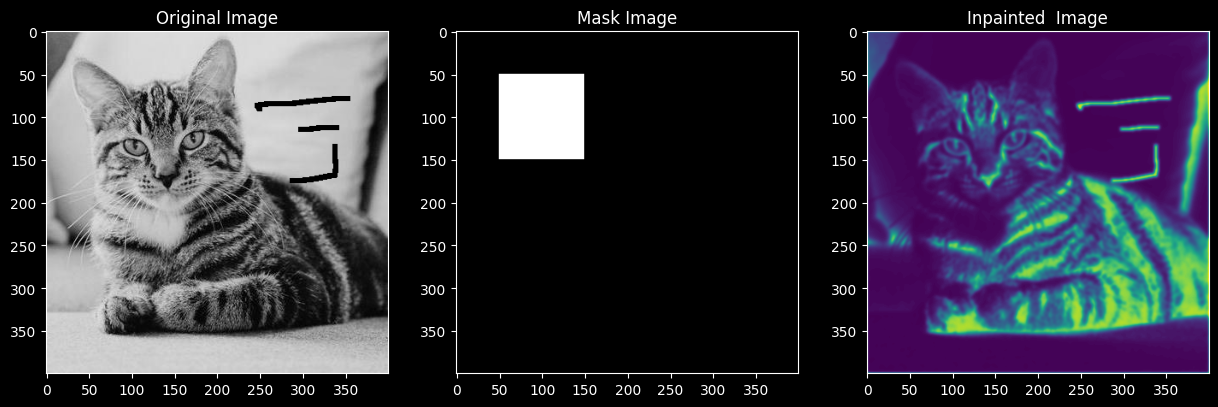

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(mask,cv2.COLOR_BGR2RGB))
plt.title('Mask Image')


plt.subplot(1,3,3)
plt.imshow(inpainted_image)
plt.title('Inpainted  Image')

plt.show()